In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d389236a87663a38acb37053be4f7ffd


In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | burica
City not found. Skipping...
Processing Record 2 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 1 | koumac
Processing Record 4 of Set 1 | lunavada
Processing Record 5 of Set 1 | saldanha
Processing Record 6 of Set 1 | mahenge
Processing Record 7 of Set 1 | balaipungut
Processing Record 8 of Set 1 | lata
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | victoria
Processing Record 13 of Set 1 | port hedland
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | alta floresta
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | hasaki
Processing Record 20 of Set 1 | nanortalik
Processing Record 21 of Set 1 | ciudad bolivar
Processing Rec

Processing Record 39 of Set 4 | miracema do tocantins
Processing Record 40 of Set 4 | new norfolk
Processing Record 41 of Set 4 | atar
Processing Record 42 of Set 4 | safaga
Processing Record 43 of Set 4 | nador
Processing Record 44 of Set 4 | grand centre
City not found. Skipping...
Processing Record 45 of Set 4 | paamiut
Processing Record 46 of Set 4 | tabuk
Processing Record 47 of Set 4 | nioro
Processing Record 48 of Set 4 | broome
Processing Record 49 of Set 4 | hay river
Processing Record 50 of Set 4 | oromocto
Processing Record 1 of Set 5 | upernavik
Processing Record 2 of Set 5 | cockburn harbour
City not found. Skipping...
Processing Record 3 of Set 5 | los llanos de aridane
Processing Record 4 of Set 5 | hami
Processing Record 5 of Set 5 | clyde river
Processing Record 6 of Set 5 | sinkat
City not found. Skipping...
Processing Record 7 of Set 5 | mujiayingzi
Processing Record 8 of Set 5 | santa maria
Processing Record 9 of Set 5 | mys shmidta
City not found. Skipping...
Proce

Processing Record 27 of Set 8 | axim
Processing Record 28 of Set 8 | mombetsu
Processing Record 29 of Set 8 | cabedelo
Processing Record 30 of Set 8 | cherskiy
Processing Record 31 of Set 8 | neringa
Processing Record 32 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 33 of Set 8 | channel-port aux basques
Processing Record 34 of Set 8 | kulhudhuffushi
Processing Record 35 of Set 8 | natchez
Processing Record 36 of Set 8 | kayerkan
Processing Record 37 of Set 8 | xining
Processing Record 38 of Set 8 | kemijarvi
Processing Record 39 of Set 8 | elizabeth city
Processing Record 40 of Set 8 | coello
Processing Record 41 of Set 8 | lagoa
Processing Record 42 of Set 8 | beira
Processing Record 43 of Set 8 | dunedin
Processing Record 44 of Set 8 | jalu
Processing Record 45 of Set 8 | zhigalovo
Processing Record 46 of Set 8 | chapada dos guimaraes
Processing Record 47 of Set 8 | skagastrond
City not found. Skipping...
Processing Record 48 of Set 8 | fairbanks
Processing Recor

Processing Record 13 of Set 12 | auki
Processing Record 14 of Set 12 | kamenka
Processing Record 15 of Set 12 | polysayevo
Processing Record 16 of Set 12 | faanui
Processing Record 17 of Set 12 | sturgeon falls
Processing Record 18 of Set 12 | tomatlan
Processing Record 19 of Set 12 | rosetta
Processing Record 20 of Set 12 | thinadhoo
Processing Record 21 of Set 12 | lakes entrance
Processing Record 22 of Set 12 | zyryanka
Processing Record 23 of Set 12 | sabha
Processing Record 24 of Set 12 | liverpool
Processing Record 25 of Set 12 | pandan
Processing Record 26 of Set 12 | nosy varika
Processing Record 27 of Set 12 | ode
Processing Record 28 of Set 12 | sakakah
Processing Record 29 of Set 12 | buala
Processing Record 30 of Set 12 | rosario oeste
Processing Record 31 of Set 12 | ornes
Processing Record 32 of Set 12 | muri
Processing Record 33 of Set 12 | danielskuil
Processing Record 34 of Set 12 | lahij
Processing Record 35 of Set 12 | miles city
Processing Record 36 of Set 12 | oran

In [15]:
len(city_data)

565

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Koumac,-20.5667,164.2833,82.17,73,60,5.82,NC,2021-12-22 01:15:07
1,Lunavada,23.1333,73.6167,59.90,29,0,3.85,IN,2021-12-22 01:15:07
2,Saldanha,-33.0117,17.9442,66.25,95,16,8.41,ZA,2021-12-22 01:15:08
3,Mahenge,-8.6833,36.7167,64.27,95,79,3.33,TZ,2021-12-22 01:15:09
4,Balaipungut,1.0500,101.2833,77.41,95,100,1.28,ID,2021-12-22 01:15:09
5,Lata,40.1629,-8.3327,60.04,90,100,9.24,PT,2021-12-22 01:15:10
6,Albany,42.6001,-73.9662,32.81,81,100,1.01,US,2021-12-22 01:12:19
7,Jamestown,42.0970,-79.2353,36.99,71,1,4.00,US,2021-12-22 01:15:10
8,Cape Town,-33.9258,18.4232,70.27,75,6,1.99,ZA,2021-12-22 01:13:46
9,Victoria,22.2855,114.1577,68.25,84,54,1.01,HK,2021-12-22 01:11:59


In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Koumac,NC,2021-12-22 01:15:07,-20.5667,164.2833,82.17,73,60,5.82
1,Lunavada,IN,2021-12-22 01:15:07,23.1333,73.6167,59.90,29,0,3.85
2,Saldanha,ZA,2021-12-22 01:15:08,-33.0117,17.9442,66.25,95,16,8.41
3,Mahenge,TZ,2021-12-22 01:15:09,-8.6833,36.7167,64.27,95,79,3.33
4,Balaipungut,ID,2021-12-22 01:15:09,1.0500,101.2833,77.41,95,100,1.28
...,...,...,...,...,...,...,...,...,...
560,Terra Santa,BR,2021-12-22 01:31:52,-2.1042,-56.4869,78.46,78,97,1.97
561,Thap Than,TH,2021-12-22 01:31:53,15.4606,99.8917,75.33,60,2,4.09
562,Iralaya,HN,2021-12-22 01:31:53,15.0000,-83.2333,75.90,76,100,6.80
563,Bayanday,RU,2021-12-22 01:31:54,53.0661,105.5139,-26.57,96,5,3.65


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

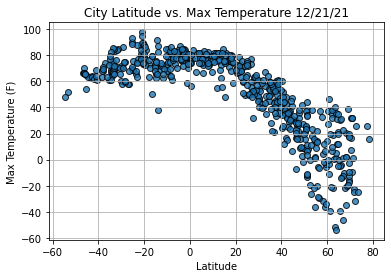

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

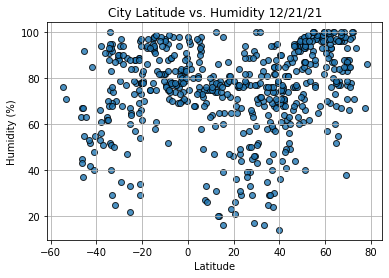

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

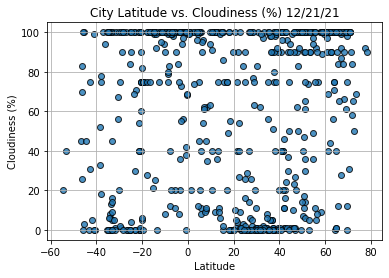

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

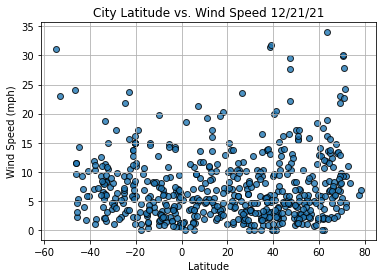

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()